# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from datetime import datetime, timedelta
import numpy as np

# Load CSV Files
* Total Cases

In [2]:
s0=requests.get('https://covid.ourworldindata.org/data/ecdc/total_cases.csv').content
total_cases = pd.read_csv(io.StringIO(s0.decode('utf-8'))).set_index('date')
total_cases.columns.name='Country/Region'
total_cases.tail()

Country/Region,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-25,417061,42.0,123.0,231.0,164.0,2.0,NaN,3.0,387.0,265.0,...,8077,55231,17.0,189.0,55.0,1.0,91.0,134.0,3.0,2.0
2020-03-26,468284,75.0,146.0,264.0,188.0,2.0,NaN,3.0,502.0,290.0,...,9529,69194,17.0,217.0,65.0,1.0,106.0,148.0,12.0,3.0
2020-03-27,528019,75.0,174.0,305.0,224.0,3.0,2.0,7.0,589.0,329.0,...,11658,85991,17.0,238.0,83.0,5.0,107.0,153.0,14.0,3.0
2020-03-28,591971,91.0,186.0,305.0,267.0,4.0,2.0,7.0,690.0,372.0,...,14543,104686,19.0,238.0,104.0,5.0,119.0,169.0,16.0,5.0
2020-03-29,657140,106.0,197.0,409.0,308.0,4.0,2.0,7.0,745.0,424.0,...,17089,124665,22.0,304.0,133.0,6.0,119.0,223.0,28.0,7.0


* Total Deaths

In [3]:
s1=requests.get('https://covid.ourworldindata.org/data/ecdc/total_deaths.csv').content
total_deaths = pd.read_csv(io.StringIO(s1.decode('utf-8'))).set_index('date')
total_deaths.columns.name='Country/Region'
total_deaths.tail()

Country/Region,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-25,18565,1.0,5.0,17.0,0.0,0.0,NaN,0.0,6.0,0.0,...,422,801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-26,20991,1.0,5.0,17.0,0.0,0.0,NaN,0.0,8.0,0.0,...,463,1050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-27,23672,1.0,6.0,21.0,3.0,0.0,0.0,0.0,12.0,1.0,...,578,1296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-28,26990,2.0,9.0,21.0,3.0,0.0,0.0,0.0,17.0,1.0,...,759,1707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-29,30451,3.0,10.0,26.0,4.0,0.0,0.0,0.0,19.0,3.0,...,1019,2191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


* Total Recovered

In [4]:
s2=requests.get('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv').content
total_recovered_raw = pd.read_csv(io.StringIO(s2.decode('utf-8')))
tr = total_recovered_raw.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum().transpose()
tr = tr.rename(columns={"US":"United States",'Korea, South':'South Korea'})
tr_idx = tr.index
tr_idx_formatted = [(datetime.strptime(idx,'%m/%d/%y').strftime('%Y-%m-%d')) for idx in tr_idx]
tr = tr.set_index([pd.Series(tr_idx_formatted)])
tr_sum = tr.sum(axis=1).to_frame()
tr_sum.columns={"World"}
total_recovered = pd.concat([tr, tr_sum.reindex(tr.index)], axis=1)
total_recovered.index.names=['date']
total_recovered.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe,World
date,,,,,,,,,,,,,,,,,,,,,
2020-03-24,1,10,24,1,0,0,52,14,115,9,...,45,140,0,0,15,17,17,0,0,108000
2020-03-25,2,17,65,1,0,0,52,16,119,9,...,52,140,0,0,15,17,17,0,0,113787
2020-03-26,2,17,29,1,0,0,63,18,172,112,...,52,150,0,0,15,20,17,0,0,122150
2020-03-27,2,31,29,1,0,0,72,28,194,225,...,52,151,0,5,31,20,17,0,0,130915
2020-03-28,2,31,31,1,0,0,72,30,244,225,...,52,151,0,5,39,21,18,0,0,139415


# Select focused data
* List current top twenties countries and Singapore + Malaysia

In [5]:
today_str = datetime.utcnow().date().strftime('%Y-%m-%d')
yesterday_str = (datetime.utcnow().date()-timedelta(days=1)).strftime('%Y-%m-%d')
total_cases = total_cases.sort_values(by=today_str,axis=1,ascending=False)
total_deaths = total_deaths.sort_values(by=today_str,axis=1,ascending=False)
Top_20 = list(total_cases.columns[0:21])
Interested_countries = Top_20 + ['Singapore','Malaysia']
print('Interested_countries are : ', Interested_countries)

Interested_countries are :  ['World', 'United States', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland', 'Netherlands', 'South Korea', 'Belgium', 'Austria', 'Turkey', 'Canada', 'Portugal', 'Brazil', 'Norway', 'Australia', 'Israel', 'Singapore', 'Malaysia']


* Filter with only the interested countries

In [6]:
IC_total_cases = total_cases[Interested_countries].fillna(method='ffill').fillna(0)
IC_total_deaths = total_deaths[Interested_countries].fillna(method='ffill').fillna(0)
IC_total_recovered = total_recovered[Interested_countries]

* Get growth rate tables

In [7]:
IC_total_cases_rate = (IC_total_cases.diff(axis=0)/(IC_total_cases+100)*100).fillna(0)
IC_total_cases_rate.tail()

Country/Region,World,United States,Italy,China,Spain,Germany,France,Iran,United Kingdom,Switzerland,...,Austria,Turkey,Canada,Portugal,Brazil,Norway,Australia,Israel,Singapore,Malaysia
date,,,,,,,,,,,,,,,,,,,,,
2020-03-25,9.336443,15.884405,7.576939,0.120810,16.553944,7.398749,10.918668,7.073181,17.451388,8.707391,...,14.790041,17.393509,15.201554,12.266450,13.472403,7.314329,23.781213,24.039409,7.446809,6.148492
2020-03-26,10.936112,20.150374,6.994603,0.147439,16.635925,13.532561,11.569889,8.135118,15.079448,9.425311,...,10.120240,22.147651,40.918221,20.452342,9.159100,11.604775,12.969990,17.780478,1.497006,9.071730
2020-03-27,11.310898,19.510750,7.630303,0.135071,15.239483,13.635935,13.406255,8.096658,18.106821,9.247272,...,16.005050,32.072942,15.371540,15.065862,15.986733,7.371007,11.236987,10.737527,3.746398,11.027687
2020-03-28,10.801407,17.841124,6.881221,0.162793,12.267959,12.928803,11.520082,9.021954,19.702247,11.389708,...,8.567398,35.684719,14.011276,16.575092,14.273529,11.545776,6.095457,11.770335,16.586538,5.749668
2020-03-29,9.915556,16.013305,6.453355,0.156474,11.318903,7.531293,12.238885,8.662837,14.811798,7.908240,...,7.079013,22.713943,12.705067,17.115750,12.162837,6.692015,11.025838,15.703146,7.862680,6.570248


# Plot data

C:\Users\kohte\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kohte\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


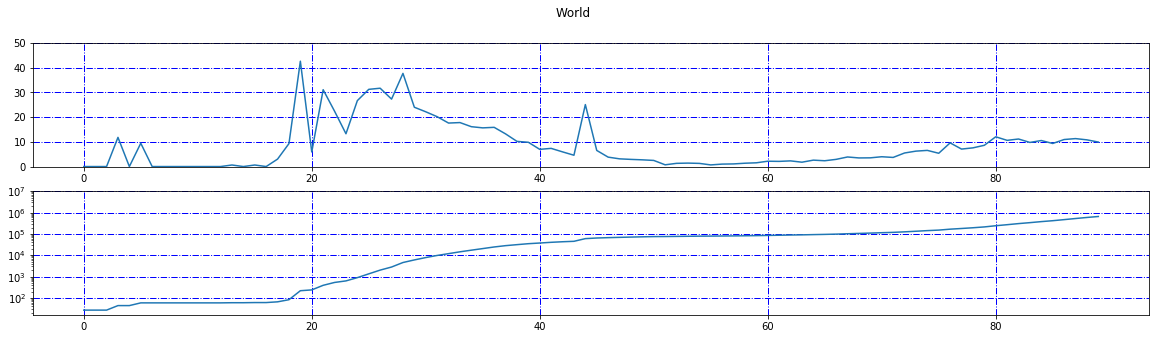

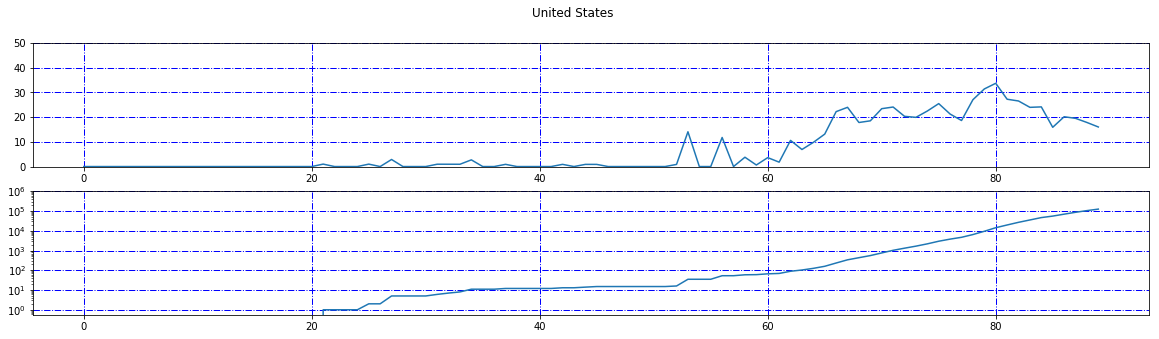

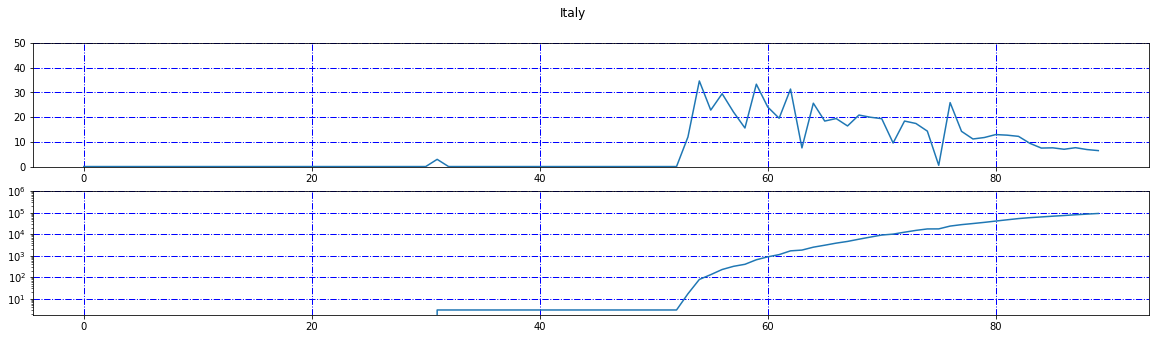

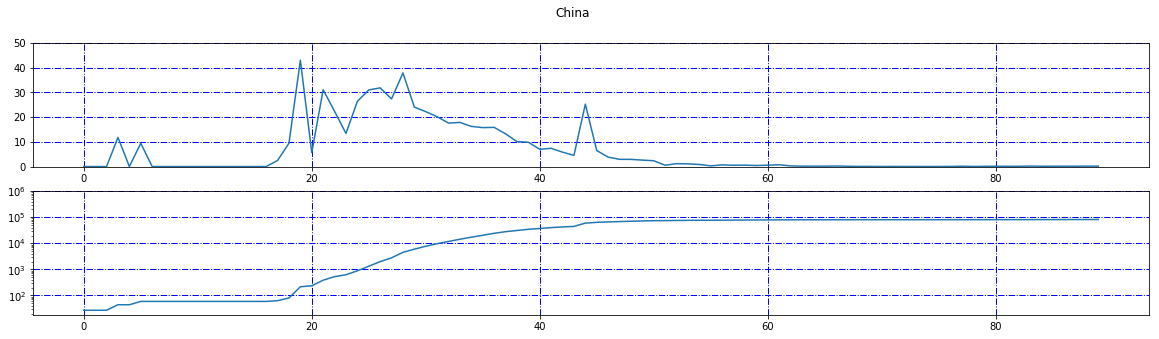

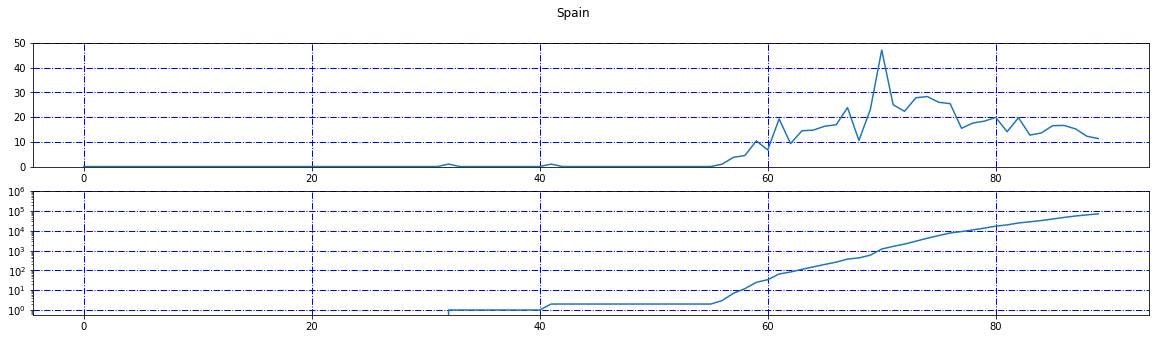

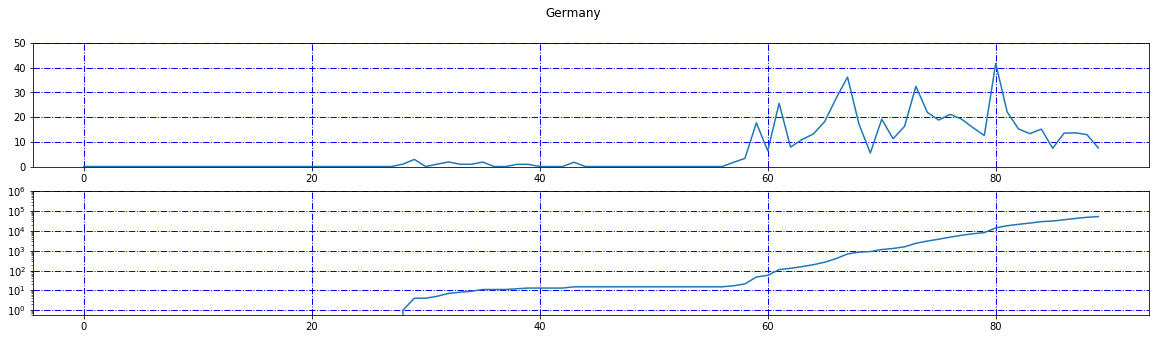

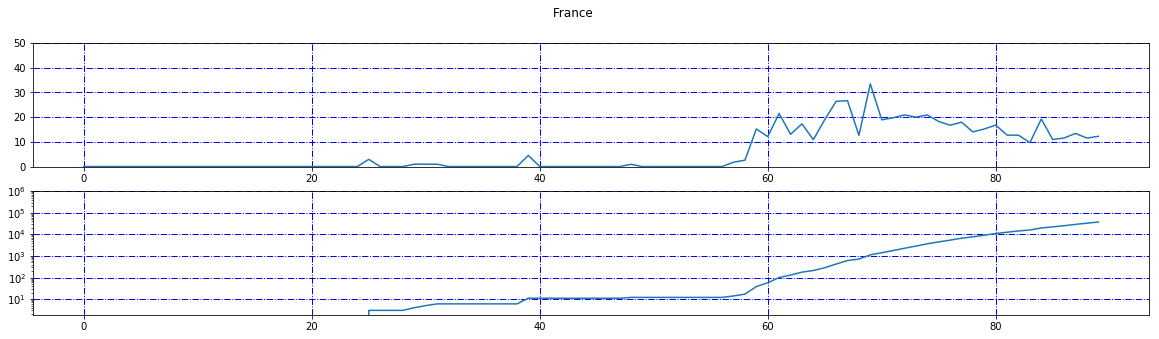

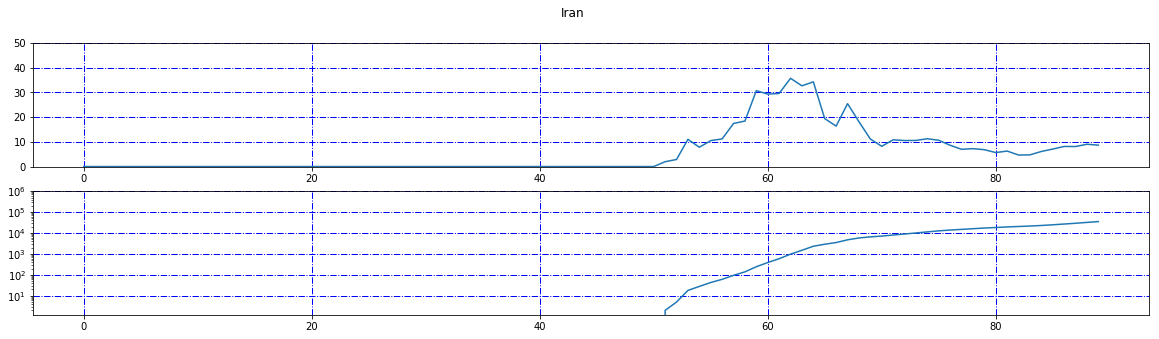

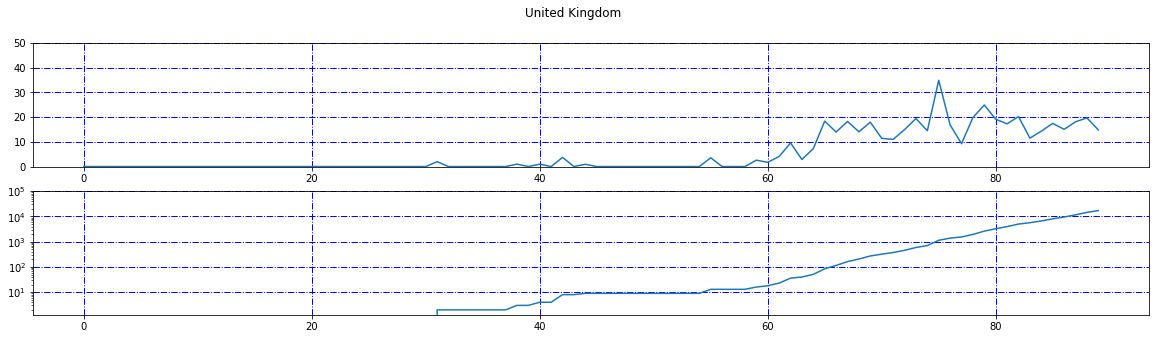

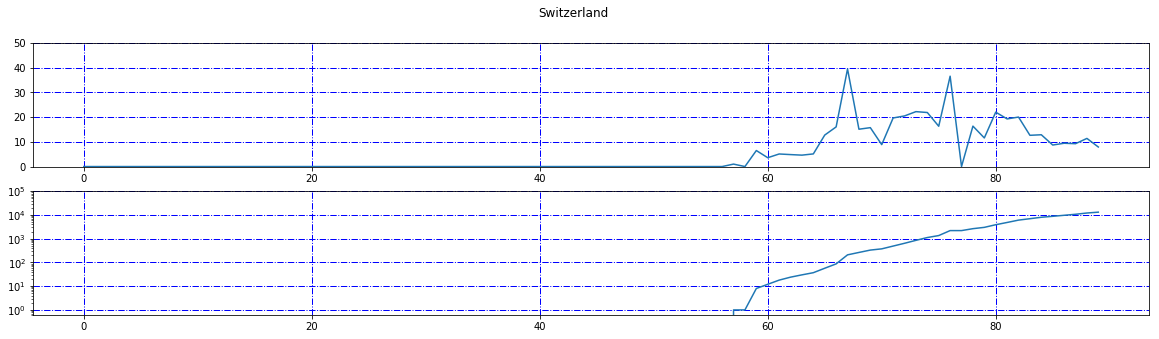

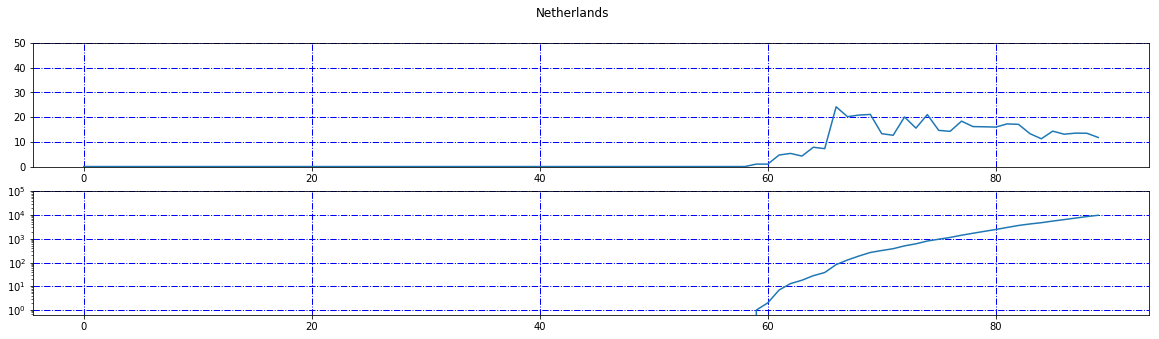

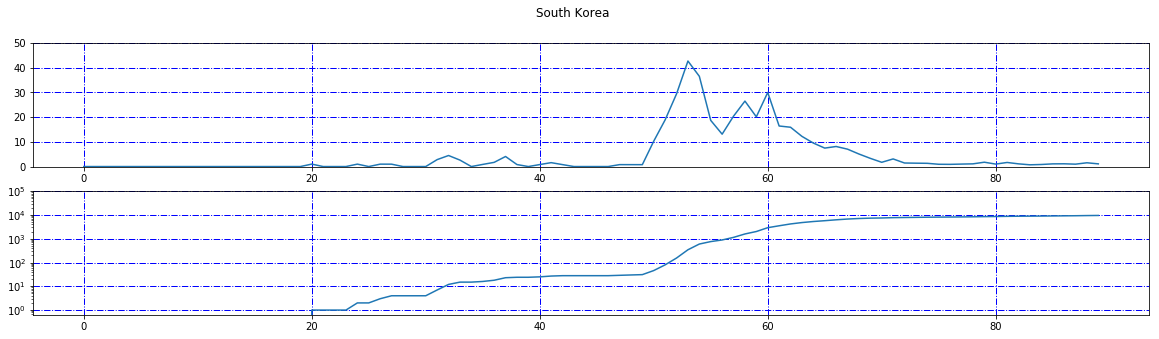

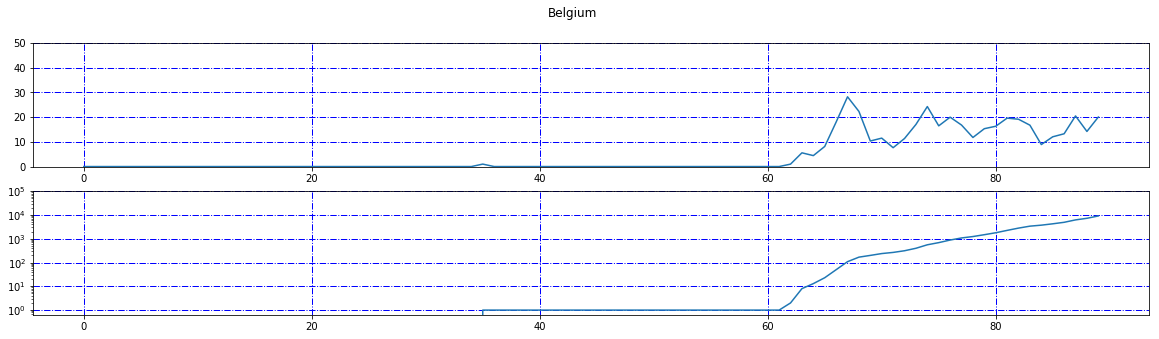

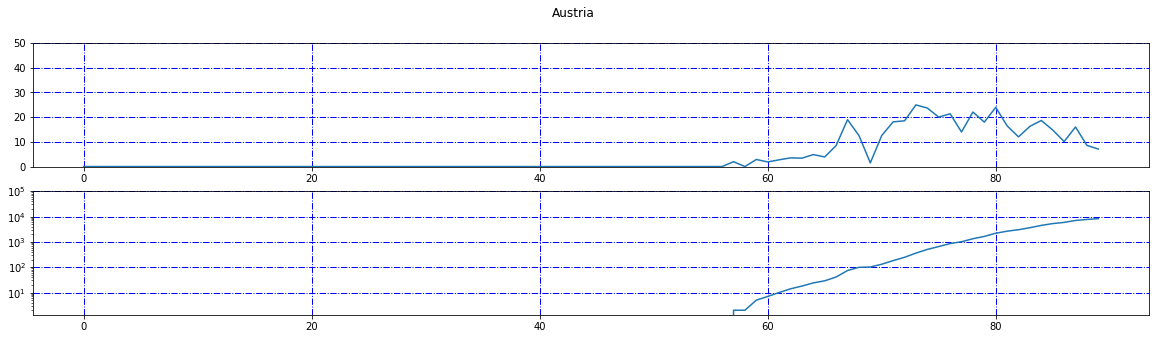

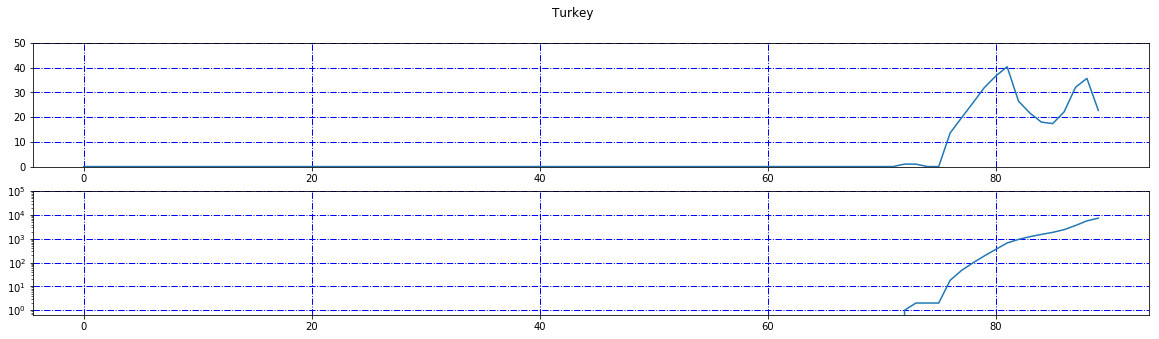

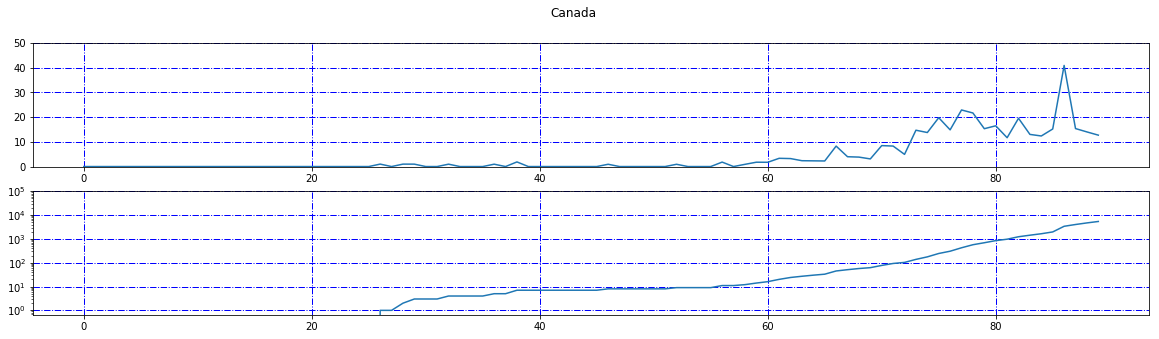

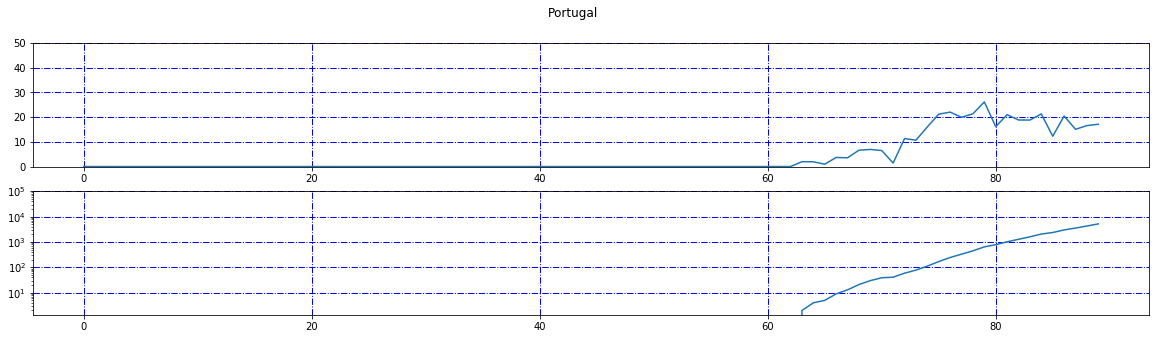

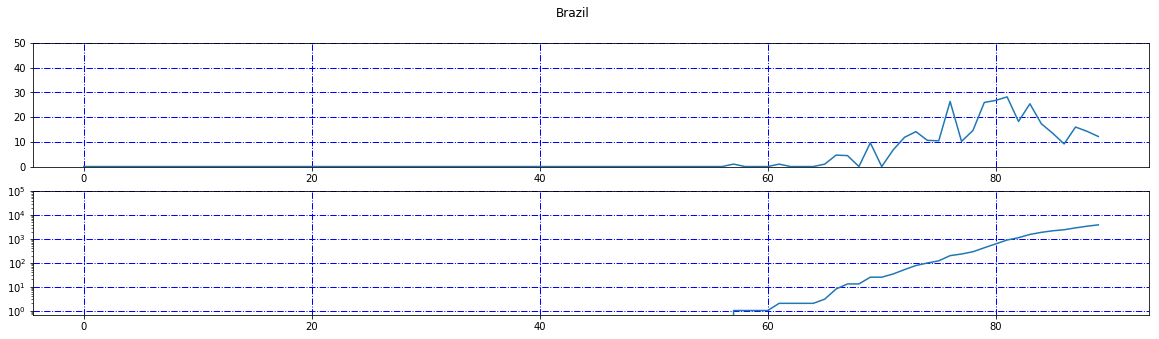

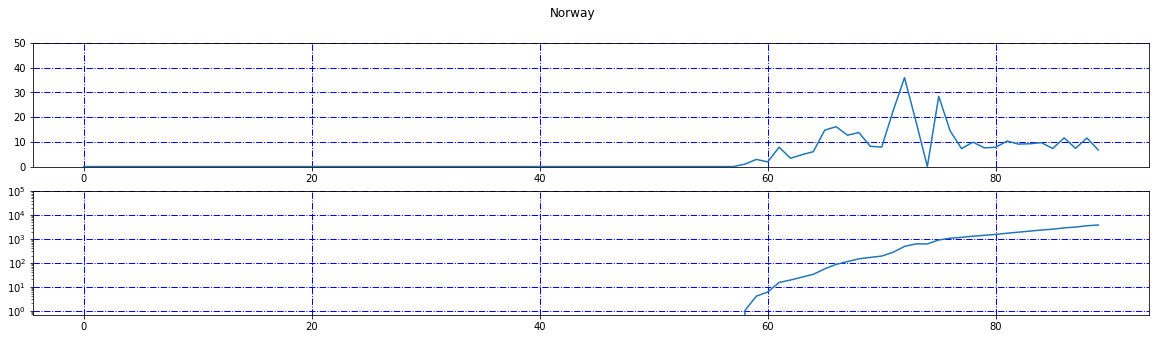

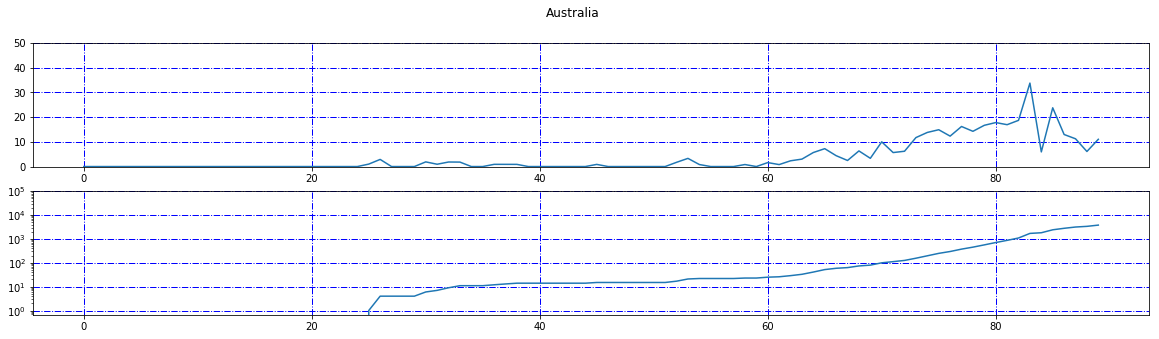

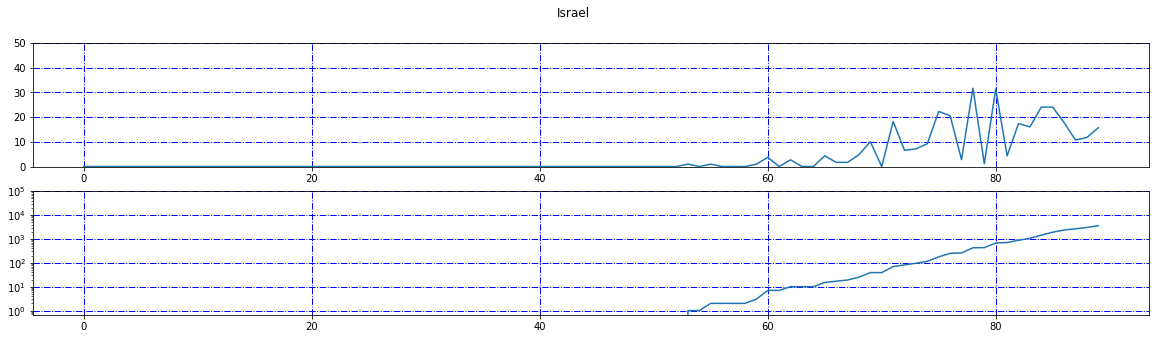

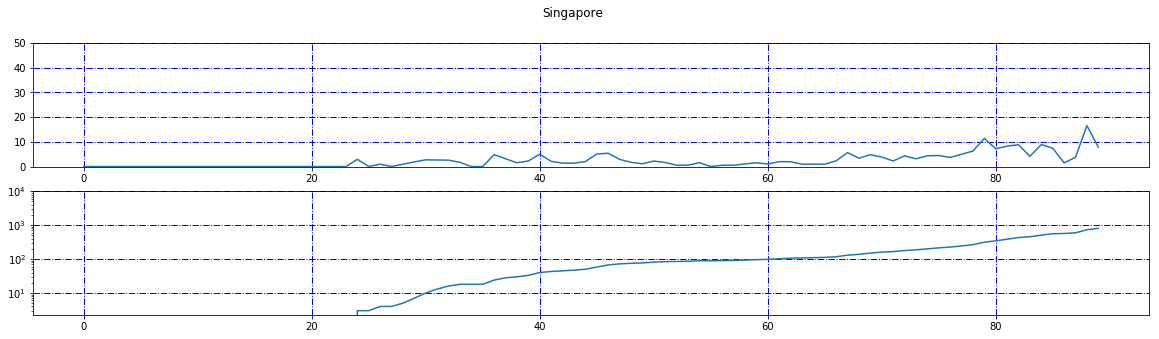

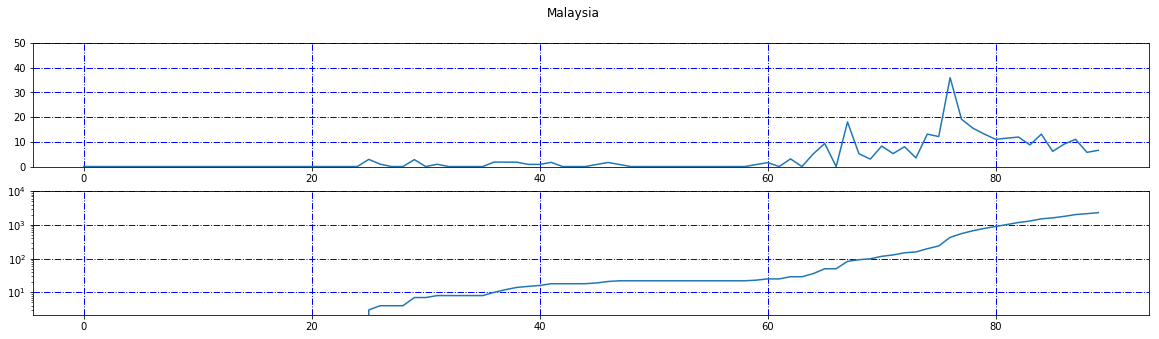

In [8]:
for country in Interested_countries:
    plt.rcParams["figure.figsize"] = (20,5)
    fig, (ax1, ax2) = plt.subplots(2)    
    ax1.set_ylim([0,50])
    ax1.grid(color='b', linestyle='-.', linewidth=1)
    ax1.plot(list(IC_total_cases_rate[country]))   
    ax2.set_yscale('log')
    ls_IC_total_cases = list(IC_total_cases[country])
    ax2.plot(ls_IC_total_cases)
    ax2.grid(color='b', linestyle='-.', linewidth=1)
    ax2.set_ylim([0,10**(round(np.log10(max(ls_IC_total_cases)))+1)])
    fig.suptitle(country)
    

# Plot table

In [9]:
last_day_rate = [IC_total_cases_rate[country][-1] for country in Interested_countries]
last_3days_rate = [IC_total_cases_rate[country][-3:-1].mean() for country in Interested_countries]
last_7days_rate = [IC_total_cases_rate[country][-7:-1].mean() for country in Interested_countries]
TotalCase = [IC_total_cases[country][-1] for country in Interested_countries]
TotalDeath = [IC_total_deaths[country][-1] for country in Interested_countries]
TotalRecovered = list(IC_total_recovered.loc[yesterday_str,:])
DeathRatio = [td/(tr+td)*100 for td, tr in zip(TotalDeath, TotalRecovered)]
Dropping = [l3<l7 for l3, l7 in zip(last_3days_rate, last_7days_rate)]


last_rate_dict = {'country':Interested_countries, 'Last day rate %':last_day_rate,'Last 3 days rate %':last_3days_rate, 
                  'Last 7 days rate %':last_7days_rate, 'TotalCase': TotalCase, 'TotalRecovered':TotalRecovered,
                  'TotalDeath': TotalDeath, 'DeathRatio %': DeathRatio, 'Dropping':Dropping}
pd.DataFrame.from_dict(last_rate_dict).set_index('country')

,Last day rate %,Last 3 days rate %,Last 7 days rate %,TotalCase,TotalRecovered,TotalDeath,DeathRatio %,Dropping
country,,,,,,,,
World,9.915556,11.056152,10.445350,657140.0,139415,30451.0,17.926483,False
United States,16.013305,18.675937,20.247898,124665.0,1072,2191.0,67.146797,True
Italy,6.453355,7.255762,7.658098,92472.0,12384,10023.0,44.731557,True
China,0.156474,0.148932,0.145093,82342.0,75100,3306.0,4.216514,False
Spain,11.318903,13.753721,14.503913,72248.0,12285,5690.0,31.655076,True
Germany,7.531293,13.282369,12.657949,52547.0,8481,389.0,4.385569,False
France,12.238885,12.463169,12.719937,37575.0,5724,2314.0,28.788256,True
Iran,8.662837,8.559306,7.191875,35408.0,11679,2517.0,17.730347,False
United Kingdom,14.811798,18.904534,16.027509,17089.0,151,1019.0,87.094017,False
